In [1]:
%load_ext autoreload
%autoreload 2
root_dir = r"c:/Users/aagab/codes/Human_pose/new_statistical_coach/"

In [2]:
import sys
import os

# Get the absolute path to the project root
project_root = os.path.dirname(r"c:/Users/aagab/codes/Human_pose/new_statistical_coach/")
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))
sys.path.insert(0, os.path.join(project_root, 'utils'))
# project_root = os.path.dirname(r"c:/Users/aagab/codes/Human_pose/new_statistical_coach/")
# print(sys.path)  # Verify the paths are added

> Currently, we are getting HOLD phase features after we are sure of holding the pose for 0.5 seconds

SHAPE OF VELOCITY MAGNITUDE: torch.Size([221, 33])
SHAPE OF SMOOTHED VELOCITY: torch.Size([221])
Movement detected at frame 1
Hold phase detected at frame 148
HOLD FRAME NUMBER: 167


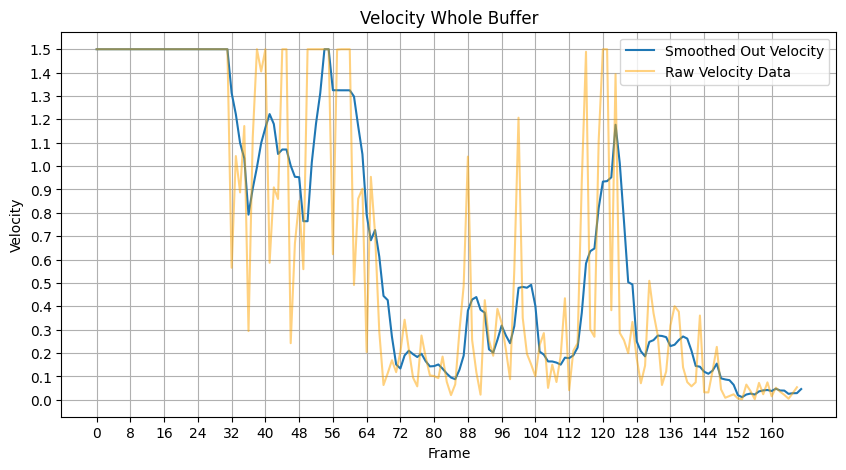

{0: (<PoseState.WAITING: 'waiting'>, 1), 1: (<PoseState.MOVEMENT: 'movement'>, 167), 168: (<PoseState.HOLD: 'hold'>, 0)}
Start Time: 0.0670391061452514
End Time: 12.201117318435754
Frame Rate: 14.916666666666666
Segment saved: clipped_videos_fish_CN.mp4\movement_1_182.mp4


In [3]:
from process_yoga_video import process_yoga_video

video_path = os.path.join(root_dir, "clips_for_dev/fish_CN.mp4")
# video_path = os.path.join(root_dir, "clips_for_dev/first.mp4")
state_machine, angles_dict = process_yoga_video(video_path, give_segmented_clip=True, hold_duration=20)

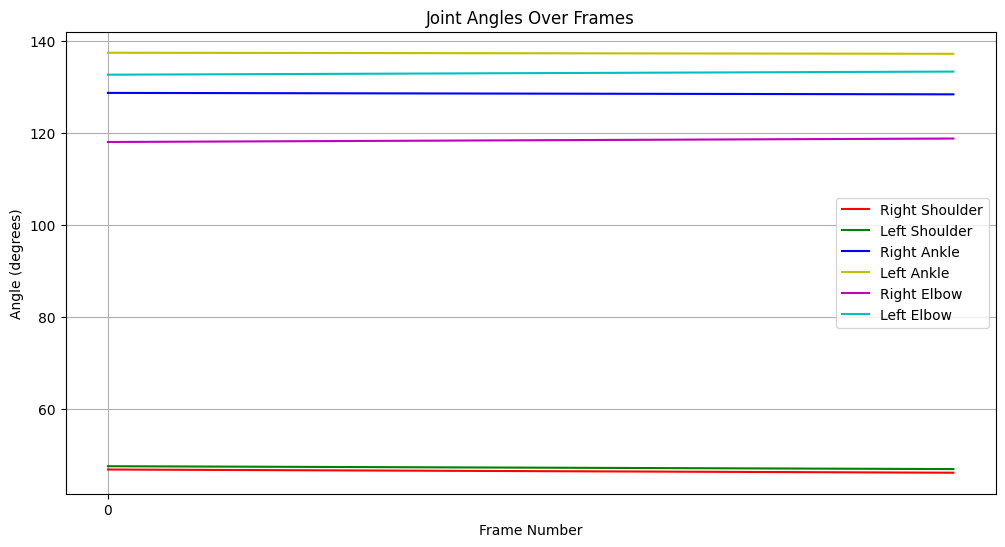

{0: {'right_shoulder_3d': tensor(46.7279, dtype=torch.float64),
  'left_shoulder_3d': tensor(47.4453, dtype=torch.float64),
  'right_elbow_3d': tensor(118.0165, dtype=torch.float64),
  'left_elbow_3d': tensor(132.6626, dtype=torch.float64),
  'right_hip_3d': tensor(168.1599, dtype=torch.float64),
  'left_hip_3d': tensor(172.7771, dtype=torch.float64),
  'right_knee_3d': tensor(167.5327, dtype=torch.float64),
  'left_knee_3d': tensor(173.2925, dtype=torch.float64),
  'right_ankle_3d': tensor(128.7019, dtype=torch.float64),
  'left_ankle_3d': tensor(137.4455, dtype=torch.float64)},
 1: {'right_shoulder_3d': tensor(46.0301, dtype=torch.float64),
  'left_shoulder_3d': tensor(46.8226, dtype=torch.float64),
  'right_elbow_3d': tensor(118.7680, dtype=torch.float64),
  'left_elbow_3d': tensor(133.3426, dtype=torch.float64),
  'right_hip_3d': tensor(167.9564, dtype=torch.float64),
  'left_hip_3d': tensor(172.6323, dtype=torch.float64),
  'right_knee_3d': tensor(167.9308, dtype=torch.float64),
 

In [25]:
joint_angle_values = angles_dict
from plot_joint_angles import plot_joint_angles

plot_joint_angles(joint_angle_values)
joint_angle_values

In [5]:
# removes _3d prefix
def remove_prefix(joint_angle_values):
    jav = {}
    for k, v in joint_angle_values.items():
        jav[k] = {ik[:-3]: iv for ik, iv in v.items()}
    return jav

joint_angle_values = remove_prefix(joint_angle_values)
joint_angle_values

{0: {'right_shoulder': tensor(46.7279, dtype=torch.float64),
  'left_shoulder': tensor(47.4453, dtype=torch.float64),
  'right_elbow': tensor(118.0165, dtype=torch.float64),
  'left_elbow': tensor(132.6626, dtype=torch.float64),
  'right_hip': tensor(168.1599, dtype=torch.float64),
  'left_hip': tensor(172.7771, dtype=torch.float64),
  'right_knee': tensor(167.5327, dtype=torch.float64),
  'left_knee': tensor(173.2925, dtype=torch.float64),
  'right_ankle': tensor(128.7019, dtype=torch.float64),
  'left_ankle': tensor(137.4455, dtype=torch.float64)},
 1: {'right_shoulder': tensor(46.0301, dtype=torch.float64),
  'left_shoulder': tensor(46.8226, dtype=torch.float64),
  'right_elbow': tensor(118.7680, dtype=torch.float64),
  'left_elbow': tensor(133.3426, dtype=torch.float64),
  'right_hip': tensor(167.9564, dtype=torch.float64),
  'left_hip': tensor(172.6323, dtype=torch.float64),
  'right_knee': tensor(167.9308, dtype=torch.float64),
  'left_knee': tensor(173.1352, dtype=torch.float64)

In [6]:
from yoga_pose_target_data import joint_configs

detailed_jav = {}
for k, v in joint_angle_values[0].items():
    reference_joints = joint_configs[k]['joint_names']
    detailed_jav[k] = (reference_joints, v)
    # print(reference_joints)
    
detailed_jav

{'right_shoulder': (('right_elbow', 'right_shoulder', 'right_hip'),
  tensor(46.7279, dtype=torch.float64)),
 'left_shoulder': (('left_elbow', 'left_shoulder', 'left_hip'),
  tensor(47.4453, dtype=torch.float64)),
 'right_elbow': (('right_shoulder', 'right_elbow', 'right_wrist'),
  tensor(118.0165, dtype=torch.float64)),
 'left_elbow': (('left_shoulder', 'left_elbow', 'left_wrist'),
  tensor(132.6626, dtype=torch.float64)),
 'right_hip': (('right_shoulder', 'right_hip', 'right_knee'),
  tensor(168.1599, dtype=torch.float64)),
 'left_hip': (('left_shoulder', 'left_hip', 'left_knee'),
  tensor(172.7771, dtype=torch.float64)),
 'right_knee': (('right_hip', 'right_knee', 'right_ankle'),
  tensor(167.5327, dtype=torch.float64)),
 'left_knee': (('left_hip', 'left_knee', 'left_ankle'),
  tensor(173.2925, dtype=torch.float64)),
 'right_ankle': (('right_knee', 'right_ankle', 'right_foot_index'),
  tensor(128.7019, dtype=torch.float64)),
 'left_ankle': (('left_knee', 'left_ankle', 'left_foot_ind

In [7]:
from Language_Model import generate_pose_feedback_prompt

In [8]:
from src.model.STSAE_GCN import STSAE_GCN
import torch
from yoga_pose_target_data import poses
# Define constants
NUM_CHANNELS = 3
HIDDEN_SIZE = 64
NUM_CLASSES = len(poses)
NUM_FRAMES = 20

model = STSAE_GCN(NUM_CHANNELS, HIDDEN_SIZE, NUM_CLASSES, NUM_FRAMES)

model_path = os.path.join(root_dir, 'src/model/STSAE_GCN.pth')
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}")

# Load the pre-trained model weights
model.load_state_dict(torch.load(model_path,map_location='cpu', weights_only=True))

<All keys matched successfully>

In [9]:
video_name = os.path.basename(video_path)
features_dev_path = os.path.join('..', 'features_for_dev', f'{os.path.splitext(video_name)[0]}.pt')

if os.path.exists(features_dev_path):
    # Load pre-computed features if they exist
    features = torch.load(features_dev_path, weights_only=False)

In [10]:
history = state_machine.get_state_history()
history

{0: (<PoseState.WAITING: 'waiting'>, 1),
 1: (<PoseState.MOVEMENT: 'movement'>, 167),
 168: (<PoseState.HOLD: 'hold'>, 0)}

In [21]:
from src.pose_analysis.state_machine import PoseState
for k, v in history.items():
    if v[0] == PoseState.MOVEMENT:
        start_frame = k
        end_frame = start_frame + v[1]

# end_frame=140
start_frame, end_frame

(1, 168)

In [22]:
action = features[start_frame: end_frame]
def sub_sample(data, sampling_length = 20):
    # data(Number_of_frames, 3, 33)
    data = data.permute(0, 2,1)
    total_frames = data.shape[0]
    indices = torch.linspace(0, total_frames -1 , sampling_length, dtype= int)
    return data[indices]

sampled_action = sub_sample(action).permute(1,0,2).unsqueeze_(0).float()
sampled_action.shape

torch.Size([1, 3, 20, 33])

In [23]:
from yoga_pose_target_data import poses

model.eval()
with torch.no_grad():
    model_output = model(sampled_action)

predicted_class = torch.argmax(model_output, dim=1).item()

top_5_values, top_5_indices = torch.topk(model_output, k=5, dim=1)
top_5_probabilities = torch.softmax(top_5_values, dim=1)[0]
top_5_classes = [poses[idx] for idx in top_5_indices[0]]

print("Top 5 Predicted Poses:")
for prob, pose_name in zip(top_5_probabilities, top_5_classes):
    print(f"{pose_name}: {prob.item()*100:.2f}%")

print()
# print(f"Model Output Shape: {model_output.shape}")
pose = poses[predicted_class]
print(f"Predicted Class: {pose}")


Top 5 Predicted Poses:
fish: 52.05%
corpse: 47.95%
extended-side-angle: 0.01%
downward-dog: 0.00%
cockerel: 0.00%

Predicted Class: fish


In [24]:
# Extract pose name from video path
from yoga_pose_target_data import TARGET_ANGLES
prompt = generate_pose_feedback_prompt(detailed_jav, TARGET_ANGLES[pose], pose, joint_configs)
print(prompt)

Action: fish Pose

Current Joint Analysis:

- Right Shoulder:
  Current: 46.7°
  Target: 90.0°
  Involved parts: right_elbow, right_shoulder, right_hip

- Left Shoulder:
  Current: 47.4°
  Target: 90.0°
  Involved parts: left_elbow, left_shoulder, left_hip

- Right Hip:
  Current: 168.2°
  Target: 180.0°
  Involved parts: right_shoulder, right_hip, right_knee

- Left Hip:
  Current: 172.8°
  Target: 180.0°
  Involved parts: left_shoulder, left_hip, left_knee

- Right Elbow:
  Current: 118.0°
  Target: 90.0°
  Involved parts: right_shoulder, right_elbow, right_wrist

- Left Elbow:
  Current: 132.7°
  Target: 90.0°
  Involved parts: left_shoulder, left_elbow, left_wrist


Context:
- This is a fish position.
- Focus on angles representing proper body alignment.
Task: Respond ONLY with the coach's feedback in 5-10 words. Avoid any extra explanations or numbers.
Keep it short, direct, and actionable, like a yoga instructor would.
Only focus on most significant flaw and give output like the 

In [16]:
from Language_Model import get_llama_feedback

model_feedback = get_llama_feedback(prompt, temperature=0.1)

Engage your right shoulder, deepen the stretch.

In [17]:
from text_to_speech import text_to_speech

Using device: cpu

Loading model...
c:\Users\aagab\codes\Human_pose\new_statistical_coach\scripts\tts_model\kokoro-v0_19.pth
espeak-ng library paths set up successfully
Importing plbert module...


c:\Users\aagab\codes\Human_pose\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Importing istftnet module...
Importing models module...
Importing kokoro module...
Phonemizer test successful: 'Hello' -> həloʊ 
Building model...
Model loaded successfully on cpu

Loading voice...


In [18]:
audio = text_to_speech(model_feedback)
def inline_audio(audio):
    from IPython.display import Audio, display
    SAMPLE_RATE = 22050
    display(Audio(audio, rate=SAMPLE_RATE))

inline_audio(audio)


Generating speech for: 'Engage your right shoulder, deepen the stretch.'
Debug - Processed phonemes: 'ɛŋɡˈeɪdʒ jʊɹ ɹˈaɪt ʃˈoʊldɚ, dˈiːpən ðə stɹˈɛtʃ.'

Audio saved to output_sound\output.wav
Generated phonemes: ɛŋɡˈeɪdʒ jʊɹ ɹˈaɪt ʃˈoʊldɚ, dˈiːpən ðə stɹˈɛtʃ.


In [19]:
from Language_Model import get_local_language_model_feedback
model_feedback = get_local_language_model_feedback(prompt, temperature=0)

Error communicating with LM Studio server: HTTPConnectionPool(host='localhost', port=1234): Max retries exceeded with url: /v1/chat/completions (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001D7AE71F320>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))


In [20]:
audio = text_to_speech(model_feedback)
inline_audio(audio)


Generating speech for: ''
Error generating speech: cannot unpack non-iterable NoneType object
Error: Failed to generate audio


Traceback (most recent call last):
  File "c:\Users\aagab\codes\Human_pose\new_statistical_coach\scripts\text_to_speech.py", line 228, in generate_speech
    audio, phonemes = kokoro_module.generate(model, text, voice, lang=lang)
    ^^^^^^^^^^^^^^^
TypeError: cannot unpack non-iterable NoneType object


ValueError: No audio data found. Expecting filename, url, or data.

In [996]:
# Clip video from frame 295 onwards using ffmpeg

# Get the output video path in the current working directory
output_video_path = os.path.join(os.getcwd(), 'fish.mp4')

import subprocess
from src.utils.video_utils import get_video_frame_rate

# video_path = os.path.join(root_dir, "clips_for_dev/.mp4")
frame_rate = get_video_frame_rate(video_path)
start_frame = 295
start_time = start_frame / frame_rate

output_file = "extended_traingle_clip.mp4"

# FFmpeg command to extract the segment from start_frame to end
cmd = [
    "ffmpeg", "-y",  # Overwrite output file if it exists
    "-i", video_path,
    "-ss", f"{start_time:.2f}",  # Start time
    "-c:v", "libx264",  # Video codec
    "-preset", "fast",  # Encoding speed
    "-crf", "23",  # Constant Rate Factor (quality)
    output_file
]

result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)